In [1]:
import pandas as pd

In [6]:
import pff


metadata_df = pd.read_parquet("./data/13335/metadata.parquet")
metadata_df = pff._process_metadata_pff(metadata_df)

In [8]:
df = pd.read_parquet("./data/cross.parquet")
df = df.sort_values(by=["frame_id", "team", "shirt"])

In [36]:
df_cross = df[df["cross_id"] == 1]

df_cross = pd.merge(df_cross, metadata_df[["frame_id", "event_team_id", "event_type"]], on="frame_id", how="left")

frame_id = df_cross[df_cross["possession_type"] == "Frame_PossessionEventType.CROSS"].iloc[0]["frame_id"]
event_team_id = df_cross[df_cross["possession_type"] == "Frame_PossessionEventType.CROSS"].iloc[0]["event_team_id"] 

event_team_by_frame = df_cross[df_cross["event_team_id"].notna()].groupby("frame_id").first()

def check_cross_success(frame_id, team_id):
    future_frames = event_team_by_frame.loc[event_team_by_frame.index > frame_id]
    if future_frames.empty:
        return False  # Não há frames futuros
    next_team_id = future_frames.iloc[0]["event_team_id"]
    return next_team_id == team_id

df_cross["cross_success"] = check_cross_success(frame_id, event_team_id)

df_cross

,frame_id,period,shirt,x,y,team,ball_x,ball_y,ball_z,vx,vy,speed,possession_type,cross_id,event_team_id,event_type,cross_success
0,33264,1,6,-29.706,0.280,away,-17.26,18.40,0.00,-0.179818,-0.029970,0.182299,None,1.0,<NA>,NaN,True
1,33264,1,7,-24.090,-0.368,away,-17.26,18.40,0.00,-0.239758,0.000000,0.239758,None,1.0,<NA>,NaN,True
2,33264,1,10,-14.373,17.745,away,-17.26,18.40,0.00,-0.119879,1.108880,1.115341,None,1.0,<NA>,NaN,True
3,33264,1,11,-27.402,-6.287,away,-17.26,18.40,0.00,0.089909,0.029970,0.094773,None,1.0,<NA>,NaN,True
4,33264,1,15,-8.974,1.807,away,-17.26,18.40,0.00,0.269728,0.149849,0.308557,None,1.0,<NA>,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23073947,33504,1,16,-44.062,-4.769,home,-55.91,-7.27,1.21,4.465490,-3.386580,5.604420,None,1.0,<NA>,NaN,True
23073948,33504,1,17,-41.156,-4.121,home,-55.91,-7.27,1.21,4.585369,-3.176791,5.578316,None,1.0,<NA>,NaN,True
23073949,33504,1,18,-33.554,-2.489,home,-55.91,-7.27,1.21,3.446519,7.792130,8.520316,None,1.0,<NA>,NaN,True
23073950,33504,1,24,-50.790,-2.846,home,-55.91,-7.27,1.21,0.449546,-1.618365,1.679642,None,1.0,<NA>,NaN,True


In [15]:
df["possession_type"].unique()

array([None, 'Frame_PossessionEventType.PASS',
       'Frame_PossessionEventType.CHALLENGE',
       'Frame_PossessionEventType.CROSS',
       'Frame_PossessionEventType.REBOUND',
       'Frame_PossessionEventType.SHOT',
       'Frame_PossessionEventType.CLEARANCE',
       'Frame_PossessionEventType.BALL_CARRY'], dtype=object)

In [16]:
df[df["possession_type"] == "Frame_PossessionEventType.CROSS"]

,frame_id,period,shirt,x,y,team,ball_x,ball_y,ball_z,vx,vy,speed,possession_type,cross_id
120,3882,1,6,-25.147,14.176,away,-43.37,24.98,0.30,0.539455,-2.307669,2.369884,Frame_PossessionEventType.CROSS,0.0
266059,3882,1,7,-42.012,30.764,away,-43.37,24.98,0.30,-9.260647,0.599395,9.280024,Frame_PossessionEventType.CROSS,0.0
531998,3882,1,10,-45.037,17.390,away,-43.37,24.98,0.30,0.599395,-5.334612,5.368180,Frame_PossessionEventType.CROSS,0.0
797937,3882,1,11,-41.113,5.276,away,-43.37,24.98,0.30,-4.615339,-1.558426,4.871349,Frame_PossessionEventType.CROSS,0.0
1063876,3882,1,15,-26.072,1.385,away,-43.37,24.98,0.30,-3.536428,-1.558426,3.864585,Frame_PossessionEventType.CROSS,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15062496,182692,2,14,-32.679,-7.405,home,-15.34,21.64,0.89,-0.749266,0.029971,0.749865,Frame_PossessionEventType.CROSS,42.0
15592662,182692,2,15,-31.650,-1.931,home,-15.34,21.64,0.89,-3.776299,1.258766,3.980569,Frame_PossessionEventType.CROSS,42.0
16122828,182692,2,16,-32.108,4.356,home,-15.34,21.64,0.89,-3.716358,1.888150,4.168504,Frame_PossessionEventType.CROSS,42.0
16984894,182692,2,24,29.303,0.752,home,-15.34,21.64,0.89,-2.997063,0.839178,3.112331,Frame_PossessionEventType.CROSS,42.0


In [22]:
df_cross = df[df["cross_id"] == 0]

In [36]:
df_cross["possession_type"].unique()

array([None, 'Frame_PossessionEventType.PASS',
       'Frame_PossessionEventType.CHALLENGE',
       'Frame_PossessionEventType.CROSS',
       'Frame_PossessionEventType.REBOUND'], dtype=object)

In [23]:
df_cross[df_cross["possession_type"] == "Frame_PossessionEventType.CROSS"]

,frame_id,period,shirt,x,y,team,ball_x,ball_y,ball_z,vx,vy,speed,possession_type,cross_id
120,3882,1,6,-25.147,14.176,away,-43.37,24.98,0.3,0.539455,-2.307669,2.369884,Frame_PossessionEventType.CROSS,0.0
266059,3882,1,7,-42.012,30.764,away,-43.37,24.98,0.3,-9.260647,0.599395,9.280024,Frame_PossessionEventType.CROSS,0.0
531998,3882,1,10,-45.037,17.390,away,-43.37,24.98,0.3,0.599395,-5.334612,5.368180,Frame_PossessionEventType.CROSS,0.0
797937,3882,1,11,-41.113,5.276,away,-43.37,24.98,0.3,-4.615339,-1.558426,4.871349,Frame_PossessionEventType.CROSS,0.0
1063876,3882,1,15,-26.072,1.385,away,-43.37,24.98,0.3,-3.536428,-1.558426,3.864585,Frame_PossessionEventType.CROSS,0.0
1329815,3882,1,21,-39.007,-3.301,away,-43.37,24.98,0.3,-0.179818,2.247730,2.254911,Frame_PossessionEventType.CROSS,0.0
1595754,3882,1,22,-32.818,27.639,away,-43.37,24.98,0.3,-0.689304,-1.558426,1.704063,Frame_PossessionEventType.CROSS,0.0
1861693,3882,1,26,28.959,3.553,away,-43.37,24.98,0.3,0.089909,-0.449546,0.458449,Frame_PossessionEventType.CROSS,0.0
2127632,3882,1,27,-39.134,27.861,away,-43.37,24.98,0.3,1.228759,-3.416549,3.630793,Frame_PossessionEventType.CROSS,0.0
2393571,3882,1,30,-8.482,18.625,away,-43.37,24.98,0.3,0.869122,-2.787185,2.919550,Frame_PossessionEventType.CROSS,0.0


In [37]:
df_cross[df_cross["possession_type"] == "Frame_PossessionEventType.REBOUND"]

,frame_id,period,shirt,x,y,team,ball_x,ball_y,ball_z,vx,vy,speed,possession_type,cross_id
210,3972,1,6,-22.868,8.625,away,-45.44,5.63,0.32,0.629364,-2.397578,2.478807,Frame_PossessionEventType.REBOUND,0.0
266149,3972,1,7,-47.542,24.736,away,-45.44,5.63,0.32,4.615339,-6.083855,7.636403,Frame_PossessionEventType.REBOUND,0.0
532088,3972,1,10,-45.877,8.925,away,-45.44,5.63,0.32,3.985974,-4.585369,6.075656,Frame_PossessionEventType.REBOUND,0.0
798027,3972,1,11,-48.820,10.283,away,-45.44,5.63,0.32,-2.247730,-2.937034,3.698440,Frame_PossessionEventType.REBOUND,0.0
1063966,3972,1,15,-29.722,-1.757,away,-45.44,5.63,0.32,-6.683250,-2.397578,7.100297,Frame_PossessionEventType.REBOUND,0.0
1329905,3972,1,21,-40.692,-0.217,away,-45.44,5.63,0.32,-0.539455,1.708275,1.791428,Frame_PossessionEventType.REBOUND,0.0
1595844,3972,1,22,-33.286,22.814,away,-45.44,5.63,0.32,2.667306,-5.424521,6.044829,Frame_PossessionEventType.REBOUND,0.0
1861783,3972,1,26,28.409,2.454,away,-45.44,5.63,0.32,-7.192735,1.408577,7.329361,Frame_PossessionEventType.REBOUND,0.0
2127722,3972,1,27,-40.039,23.138,away,-45.44,5.63,0.32,-0.569425,-5.424521,5.454326,Frame_PossessionEventType.REBOUND,0.0
2393661,3972,1,30,-9.252,18.288,away,-45.44,5.63,0.32,-4.015944,3.206761,5.139175,Frame_PossessionEventType.REBOUND,0.0


In [24]:
metadata_df[metadata_df["frame_id"] == 3882]

,match_id,frame_id,period,elapsed_seconds,home_has_possession,event_id,event_type,event_setpiece_type,event_player_id,event_team_id,event_start_frame,event_end_frame,possession_id,possession_type,possession_start_frame,possession_end_frame,sequence,version,video_time_milli
3707,NaN,3882,1,122.18853,None,18885197.0,PFF_Frame_GameEventType.ON_THE_BALL,NaN,589.0,221.0,3817.0,3882.0,18789250.0,Frame_PossessionEventType.CROSS,3882.0,NaN,None,None,129529.53


In [45]:
metadata_df[metadata_df["frame_id"] == 3972]

,match_id,frame_id,period,elapsed_seconds,home_has_possession,event_id,event_type,event_setpiece_type,event_player_id,event_team_id,event_start_frame,event_end_frame,possession_id,possession_type,possession_start_frame,possession_end_frame,sequence,version,video_time_milli
3797,NaN,3972,1,125.191533,None,18885223.0,PFF_Frame_GameEventType.ON_THE_BALL,NaN,5151.0,218.0,3972.0,3972.0,18789274.0,Frame_PossessionEventType.REBOUND,3972.0,NaN,None,None,132532.533


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.stats import norm

# Configurações ajustadas do campo
FIELD_LENGTH = 120  # x: -60 a 60
FIELD_WIDTH = 80    # y: -40 a 40
GRID_X, GRID_Y = 50, 40

MAX_PLAYER_SPEED = 5.0  # m/s
REACTION_TIME = 0.7     # s
CONTROL_TIME_STD = 0.45
TTC_THRESHOLD = 5.0

def compute_time_to_intercept(player_pos, player_vel, target_pos):
    reaction_pos = player_pos + player_vel * REACTION_TIME
    distance = np.linalg.norm(target_pos - reaction_pos)
    tti = REACTION_TIME + distance / MAX_PLAYER_SPEED
    return tti

def compute_pitch_control_surface(df):
    players_home = df[df['team'] == 'home']
    players_away = df[df['team'] == 'away']

    x = np.linspace(-FIELD_LENGTH / 2, FIELD_LENGTH / 2, GRID_X)
    y = np.linspace(-FIELD_WIDTH / 2, FIELD_WIDTH / 2, GRID_Y)
    xx, yy = np.meshgrid(x, y)

    p_home = np.zeros_like(xx)
    p_away = np.zeros_like(xx)

    for i in range(GRID_Y):
        for j in range(GRID_X):
            target = np.array([xx[i, j], yy[i, j]])

            ttc_home = np.array([
                compute_time_to_intercept(np.array([row['x'], row['y']]), 
                                          np.array([row['vx'], row['vy']]), target)
                for _, row in players_home.iterrows()
            ])
            ttc_away = np.array([
                compute_time_to_intercept(np.array([row['x'], row['y']]), 
                                          np.array([row['vx'], row['vy']]), target)
                for _, row in players_away.iterrows()
            ])

            t_vals = np.arange(0, TTC_THRESHOLD, 0.1)
            lambda_home = np.sum(norm.pdf(t_vals[:, None], loc=ttc_home, scale=CONTROL_TIME_STD), axis=1)
            lambda_away = np.sum(norm.pdf(t_vals[:, None], loc=ttc_away, scale=CONTROL_TIME_STD), axis=1)

            p_h = np.trapz(lambda_home / (lambda_home + lambda_away + 1e-6), dx=0.1)
            p_home[i, j] = p_h
            p_away[i, j] = 1 - p_h

    return xx, yy, p_home, p_away

def plot_pitch_control_with_players(df, xx, yy, p_home, p_away, team='home'):
    cmap = 'Blues' if team == 'home' else 'Reds'
    data = p_home if team == 'home' else p_away

    plt.figure(figsize=(14, 9))
    plt.contourf(xx, yy, data, levels=20, cmap=cmap, alpha=0.7)
    plt.colorbar(label=f'Pitch Control Probability ({team})')

    # Plot jogadores
    home = df[df['team'] == 'home']
    away = df[df['team'] == 'away']

    plt.scatter(home['x'], home['y'], c='blue', edgecolors='k', s=100, label='Home')
    for _, row in home.iterrows():
        plt.text(row['x'], row['y'] + 1.0, str(int(row['shirt'])), ha='center', va='center', color='white', fontsize=8)

    plt.scatter(away['x'], away['y'], c='red', edgecolors='k', s=100, label='Away')
    for _, row in away.iterrows():
        plt.text(row['x'], row['y'] + 1.0, str(int(row['shirt'])), ha='center', va='center', color='white', fontsize=8)

    # Bola
    plt.scatter(df['ball_x'].iloc[0], df['ball_y'].iloc[0], c='black', s=60, marker='o', label='Ball')

    # Campo
    plt.plot([-60, 60], [-40, -40], 'k-')
    plt.plot([-60, 60], [40, 40], 'k-')
    plt.plot([-60, -60], [-40, 40], 'k-')
    plt.plot([60, 60], [-40, 40], 'k-')
    plt.plot([0, 0], [-40, 40], 'k--')

    # Áreas do gol (simplificadas)
    plt.gca().add_patch(Rectangle((-60, -7.32), 5.5, 14.64, edgecolor='black', facecolor='none'))
    plt.gca().add_patch(Rectangle((54.5, -7.32), 5.5, 14.64, edgecolor='black', facecolor='none'))

    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title(f'Pitch Control Map with Players and Ball ({team})')
    plt.legend()
    plt.axis('equal')
    plt.xlim(-FIELD_LENGTH / 2, FIELD_LENGTH / 2)
    plt.ylim(-FIELD_WIDTH / 2, FIELD_WIDTH / 2)
    plt.grid(True)
    plt.show()

def plot_pitch_control_both_teams(df, xx, yy, p_home, p_away):
    plt.figure(figsize=(14, 9))

    # Mapa de calor de pitch control - ambos times
    plt.contourf(xx, yy, p_away, levels=20, cmap='Reds', alpha=0.4)
    plt.contourf(xx, yy, p_home, levels=20, cmap='Blues', alpha=0.4)

    # Plot jogadores
    home = df[df['team'] == 'home']
    away = df[df['team'] == 'away']

    plt.scatter(home['x'], home['y'], c='blue', edgecolors='k', s=100, label='Home')
    for _, row in home.iterrows():
        plt.text(row['x'], row['y'] + 1.0, str(int(row['shirt'])), ha='center', va='center', color='white', fontsize=8)

    plt.scatter(away['x'], away['y'], c='red', edgecolors='k', s=100, label='Away')
    for _, row in away.iterrows():
        plt.text(row['x'], row['y'] + 1.0, str(int(row['shirt'])), ha='center', va='center', color='white', fontsize=8)

    # Bola
    plt.scatter(df['ball_x'].iloc[0], df['ball_y'].iloc[0], c='black', s=60, marker='o', label='Ball')

    # Campo
    plt.plot([-60, 60], [-40, -40], 'k-')
    plt.plot([-60, 60], [40, 40], 'k-')
    plt.plot([-60, -60], [-40, 40], 'k-')
    plt.plot([60, 60], [-40, 40], 'k-')
    plt.plot([0, 0], [-40, 40], 'k--')

    # Áreas do gol (simplificadas)
    plt.gca().add_patch(Rectangle((-60, -7.32), 5.5, 14.64, edgecolor='black', facecolor='none'))
    plt.gca().add_patch(Rectangle((54.5, -7.32), 5.5, 14.64, edgecolor='black', facecolor='none'))

    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title('Pitch Control Map (Blue = Home, Red = Away)')
    plt.legend()
    plt.axis('equal')
    plt.xlim(-FIELD_LENGTH / 2, FIELD_LENGTH / 2)
    plt.ylim(-FIELD_WIDTH / 2, FIELD_WIDTH / 2)
    plt.grid(True)
    plt.show()



/tmp/ipykernel_176786/262522865.py:53: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  p_h = np.trapz(lambda_home / (lambda_home + lambda_away + 1e-6), dx=0.1)
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


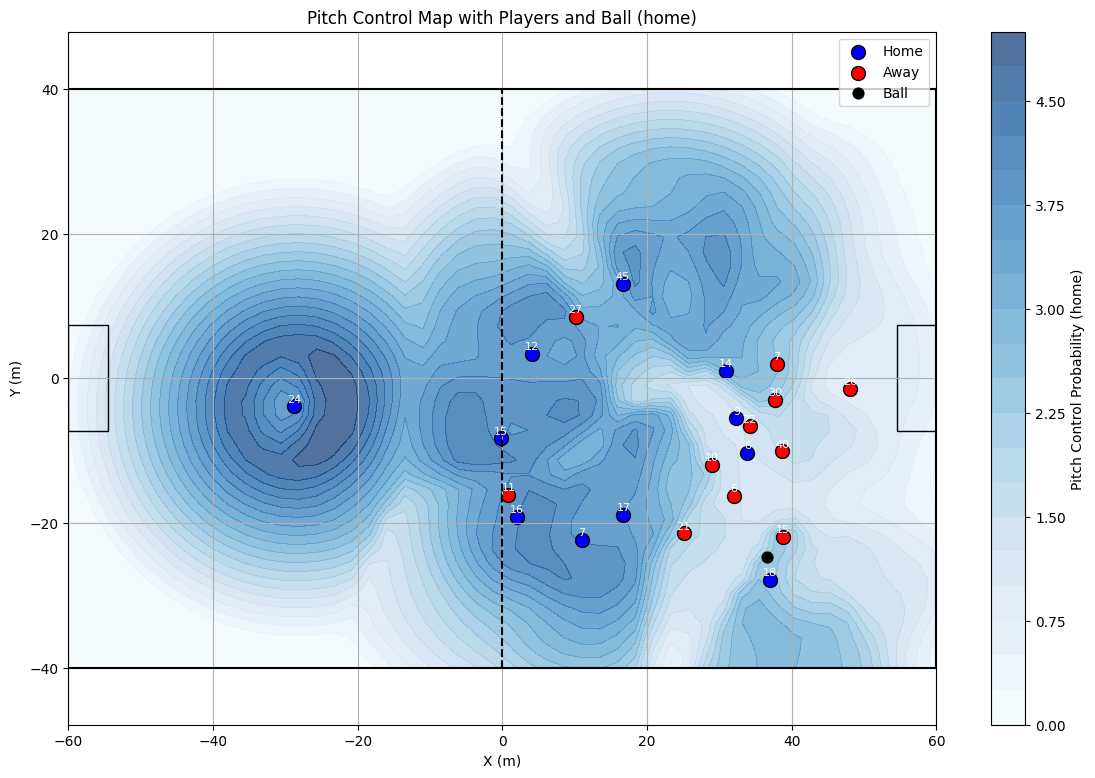

In [65]:
df_cross = df[df["cross_id"] == 3]
xx, yy, p_home, p_away = compute_pitch_control_surface(
    df_cross[df_cross["possession_type"] == "Frame_PossessionEventType.CROSS"]
)  # df = DataFrame de tracking do frame
plot_pitch_control_with_players(
df_cross[df_cross["possession_type"] == "Frame_PossessionEventType.CROSS"],
    xx, yy, p_home, p_away, team="home")


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parâmetros do modelo (ajuste conforme necessidade)
PLAYER_MAX_SPEED = 7.0  # m/s (velocidade máxima típica de um jogador)
BALL_SPEED = 20.0       # m/s (velocidade típica da bola ao cruzar)

# O campo oficial tem dimensões aproximadas 105x68m, adaptável conforme seu dataset

# Exemplo de função para calcular o tempo para o jogador chegar a um ponto
def time_to_intercept(player_pos, player_vel, target_pos, max_speed=PLAYER_MAX_SPEED):
    """
    Calcula o tempo que o jogador levaria para alcançar o target_pos
    Considera a velocidade máxima do jogador e vetor de movimento atual
    """
    # distância euclidiana entre jogador e ponto alvo
    dist = np.linalg.norm(target_pos - player_pos)

    # Velocidade atual do jogador
    speed = np.linalg.norm(player_vel)
    # Assumimos que o jogador acelera até max_speed (modelo simplificado)
    # Para simplificação, considere que ele já está em max_speed ou velocidade constante
    # Tempo = distância / velocidade média
    speed = max(speed, 0.1)  # evita divisão por zero

    time = dist / speed
    return time

# Função principal para calcular pitch control em um grid
def calculate_pitch_control(frame_df, field_dim=(105, 68), grid_size=1.0):
    """
    frame_df: DataFrame com os dados de um único frame
    field_dim: tupla (comprimento, largura) do campo em metros
    grid_size: resolução da grade do campo (1m por ponto)
    """

    length, width = field_dim
    x_grid = np.arange(-length/2, length/2 + grid_size, grid_size)
    y_grid = np.arange(-width/2, width/2 + grid_size, grid_size)
    X, Y = np.meshgrid(x_grid, y_grid)

    # Posições dos jogadores por time
    home_players = frame_df[frame_df['team']=='home'][['x','y','vx','vy']].values
    away_players = frame_df[frame_df['team']=='away'][['x','y','vx','vy']].values

    # Inicializa matriz pitch control: para cada ponto, probabilidade time home possuir bola
    pitch_control_home = np.zeros_like(X, dtype=float)

    # Para cada ponto do grid, calcular probabilidade que o time home controla a bola
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            point = np.array([X[i,j], Y[i,j]])

            # Tempo que cada jogador demoraria para chegar no ponto
            t_home = np.array([time_to_intercept(p[:2], p[2:], point) for p in home_players])
            t_away = np.array([time_to_intercept(p[:2], p[2:], point) for p in away_players])

            # Modelagem simplificada do Pitch Control:
            # P(Home controla ponto) = Prob jogador home chega antes do jogador away
            # Usamos função exp(-lambda * t), lambda arbitrário para sensibilidade

            lambda_param = 1.5  # parâmetro ajustável do modelo

            # Probabilidade do time home ganhar controle no ponto:
            # Supondo probabilidades independentes para melhor jogador de cada time
            min_t_home = np.min(t_home) if len(t_home)>0 else 1e6
            min_t_away = np.min(t_away) if len(t_away)>0 else 1e6

            p_home = np.exp(-lambda_param * min_t_home)
            p_away = np.exp(-lambda_param * min_t_away)

            pitch_control_home[i,j] = p_home / (p_home + p_away + 1e-6)  # normalização

    return X, Y, pitch_control_home

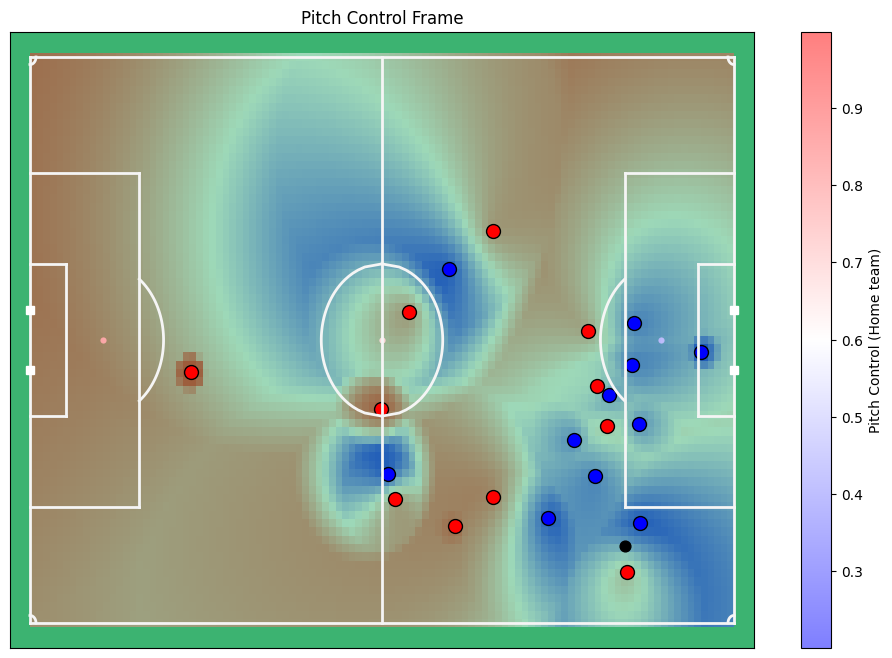

In [83]:

import plot


df_cross = df[df["cross_id"] == 3]
df2 = df_cross[df_cross["possession_type"] == "Frame_PossessionEventType.CROSS"]

X, Y, pc_home = calculate_pitch_control(df2)

# Plotagem com Friends of Tracking
# plot_pitch tem parâmetros para campo oficial 105x68m
fig, ax = plot.plot_pitch()

# Plot pitch control heatmap
# Imagem interpolada entre 0 e 1 (0=away controla, 1=home controla)
c = ax.pcolormesh(X, Y, pc_home, cmap='bwr', shading='auto', alpha=0.5)

home = df2[df2['team'] == 'home']
away = df2[df2['team'] == 'away']

plt.scatter(home['x'], home['y'], c='red', edgecolors='k', s=100, label='Home')
plt.scatter(away['x'], away['y'], c='blue', edgecolors='k', s=100, label='Fora')

plt.scatter(df2['ball_x'].iloc[0], df2['ball_y'].iloc[0], c='black', s=60, marker='o', label='Ball')

plt.colorbar(c, ax=ax, label='Pitch Control (Home team)')
plt.title(f'Pitch Control Frame')
plt.show()
                